# IMPORTAÇÃO E LIMPEZA DE DADOS

SEÇÃO PARA BAIXAR E ORGANIZAR OS ARQUIVOS .json DO DESAFIO NUMA REDE DE CO-OCORRÊNCIA UTILIZANDO O NOME DOS ARTISTAS

In [ ]:
!pip install networkx==2.6.2
!pip install nxviz==0.6.3

In [1]:
#import packages
import json
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

In [3]:
#para esse projeto iremos utilizar as 2000 primeiras playlists
dataf = pd.DataFrame()

d1 = json.load(open('mpd.slice.0-999.json', 'r'))
d2 = json.load(open('mpd.slice.1000-1999.json', 'r'))
df1 = pd.DataFrame.from_dict(d1['playlists'], orient = 'columns')
df2 = pd.DataFrame.from_dict(d2['playlists'], orient = 'columns')
dataf= pd.concat([dataf, df1], ignore_index=True)
dataf= pd.concat([dataf, df2], ignore_index=True)


In [5]:
#extraindo os nomes dos artistas
artists_array = []
for index, row in dataf.iterrows():
    for track in row['tracks']:
        artists_array.append([track['artist_name'], row['pid']])
        
artists = pd.DataFrame(artists_array, columns=['artist_name', 'pid'])
artists_merge = artists.merge(artists, on='pid')

In [6]:
#results sozinho pois consome muita RAM a execução da célula
results = pd.crosstab(artists_merge['artist_name_x'], artists_merge['artist_name_y'])
#criando o grafo do dataframe
g = nx.from_pandas_adjacency(results)
#removendo nós reflexivos
g.remove_edges_from(list(nx.selfloop_edges(g)))

In [9]:
#selecionando nós com pesos mais relevantes (maiores ou iguais a 30 )
g2 = nx.Graph()
for e, w in dict(nx.get_edge_attributes(g, 'weight')).items():
    if w >= 30:
        g2.add_edge(e[0], e[1], weight=w)

In [10]:
#total de nós, arestas e conexões
print(g2.number_of_nodes(), g2.number_of_edges(), nx.number_connected_components(g2))

3777 32040 34


In [11]:
#selecionando o grafo GCC
for component in nx.connected_components(g2):
    g1 = g.subgraph(component)
g3 = sorted(nx.connected_components(g2), key=len, reverse=True)
g3 = g2.subgraph(g3[0])

In [12]:
nx.write_graphml(g3, 'G.graphml')

#ANÁLISES MÉTRICAS

Criação das métricas globais de análise:
* Eccentricity
* Diameter
* Periphery
* Radius
* Center
* Degree
* Closeness
* Betweenness
* Eigenvector Centrality
* Análise Bivariada
* Análise Multivariada
* Análise Decomposição da Rede 2 k-cores mais profundos


#### **Excentricidade**

In [14]:
G = nx.read_graphml('G.graphml')

In [31]:
diametro = nx.diameter(G)
raio = nx.radius(G)
periphery = nx.periphery(G)
centro = nx.center(G)

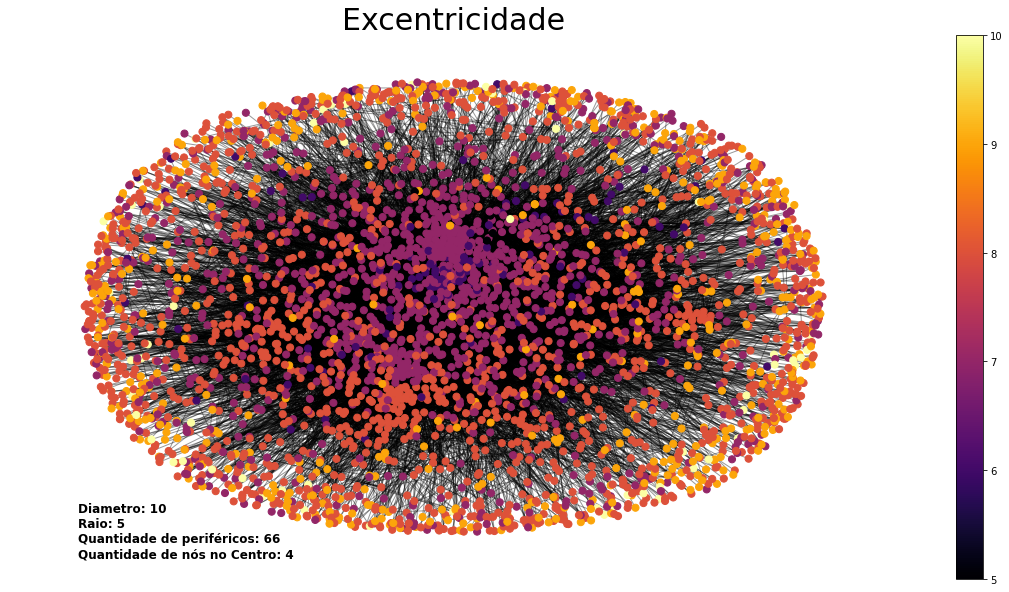

In [86]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
pos = nx.spring_layout(G, seed=1234, k=1)
color = list(dict(nx.eccentricity(G)).values())
nx.draw_networkx_edges(G,pos=pos,alpha=0.4, ax=ax)

nodes = nx.draw_networkx_nodes(G,pos=pos,node_color=color,cmap=plt.cm.inferno,ax=ax, node_size=50)
texto = "Diametro: " + str(diametro) + "\nRaio: " + str(raio) + "\nQuantidade de periféricos: " + str(len(periphery)) + "\nQuantidade de nós no Centro: " +str(len(centro))
ax.text(-1, -1.1, texto, fontweight='bold', fontsize = 'large')
plt.axis("off")
plt.title("Excentricidade",fontsize=30)
plt.colorbar(nodes)
plt.show()

In [15]:
key = []
values = []
for k, v in nx.eccentricity(G).items():
    key.append(k)
    values.append(v)

df = pd.DataFrame({'artist': key,'eccentricity': values})
df.sort_values('eccentricity', ascending=False).head(10)

,artist,eccentricity
1048,Alberta Cross,10
845,Frankie Cosmos,10
1322,Covenhoven,10
1324,Dom La Nena,10
2574,Donald Byrd,10
1329,JBM,10
1332,Kishi Bashi,10
1333,Loch Lomond,10
1336,Nico,10
1337,Night Beds,10


#### **Grau**

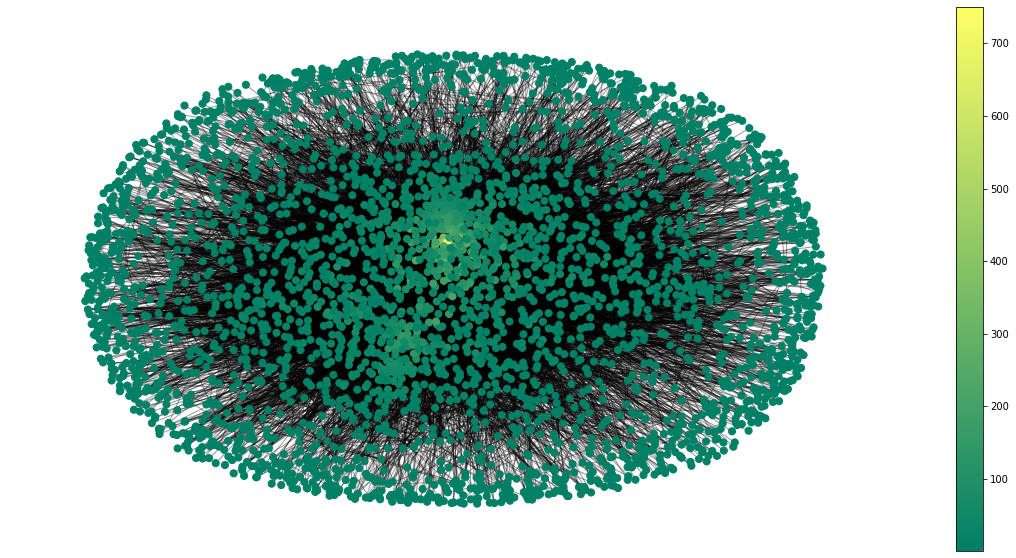

In [89]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
pos = nx.spring_layout(G, seed=1234, k=1)
color = list(dict(nx.degree(G)).values())
nx.draw_networkx_edges(G,pos=pos,alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(G,pos=pos,node_color=color,cmap=plt.cm.summer,ax=ax, node_size=50)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [84]:
key =[]
values = []

for k, v in dict(nx.degree(G)).items():
    key.append(k)
    values.append(v)
df = pd.DataFrame({'artist': key,'degree': values})
degreetop10 = df.sort_values('degree', ascending=False, ignore_index=True).head(10)
degreetop10

,artist,degree
0,Drake,750
1,Rihanna,410
2,Kanye West,401
3,Kendrick Lamar,357
4,The Weeknd,347
5,Ed Sheeran,329
6,Beyoncé,321
7,Chris Brown,306
8,Maroon 5,294
9,The Chainsmokers,286


#### **Centralidade**

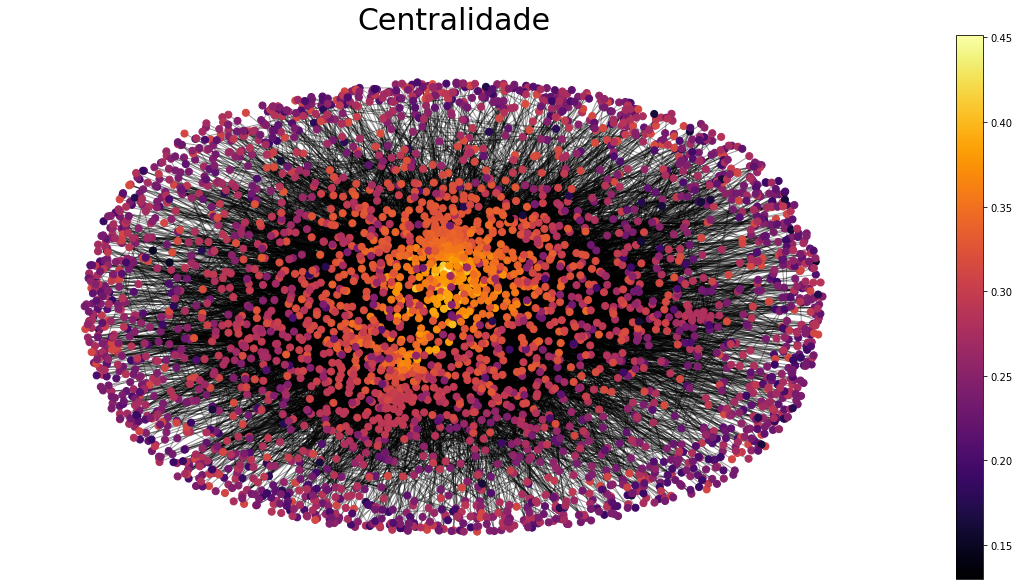

In [93]:
#irmos medir o quão próximo do centro são os nós do gráfico
fig, ax = plt.subplots(1,1,figsize=(20,10))
pos = nx.spring_layout(G, seed=1234, k=1)
#usando o método closeness_centrality iremos resgatar os valores
color = list(dict(nx.closeness_centrality(G)).values())
# draw edges
nx.draw_networkx_edges(G,pos=pos,alpha=0.4, ax=ax)
# draw nodes
nodes = nx.draw_networkx_nodes(G,pos=pos,node_color=color,cmap=plt.cm.inferno,ax=ax, node_size=50)

plt.axis("off")
plt.colorbar(nodes)
plt.title("Centralidade", fontsize=30)
plt.show()

In [94]:
key = []
values = []

for k, v in dict(nx.closeness_centrality(G)).items():
    key.append(k)
    values.append(v)
df = pd.DataFrame({'artist': key,'closeness_centrality': values})
df.sort_values('closeness_centrality', ascending=False, ignore_index=True).head(10)

,artist,closeness_centrality
0,Drake,0.451255
1,Kanye West,0.420349
2,Ed Sheeran,0.419568
3,Rihanna,0.418112
4,Beyoncé,0.415661
5,Justin Bieber,0.413947
6,The Weeknd,0.413426
7,Maroon 5,0.412154
8,Kendrick Lamar,0.411966
9,Coldplay,0.409910


#### **Intermediação**

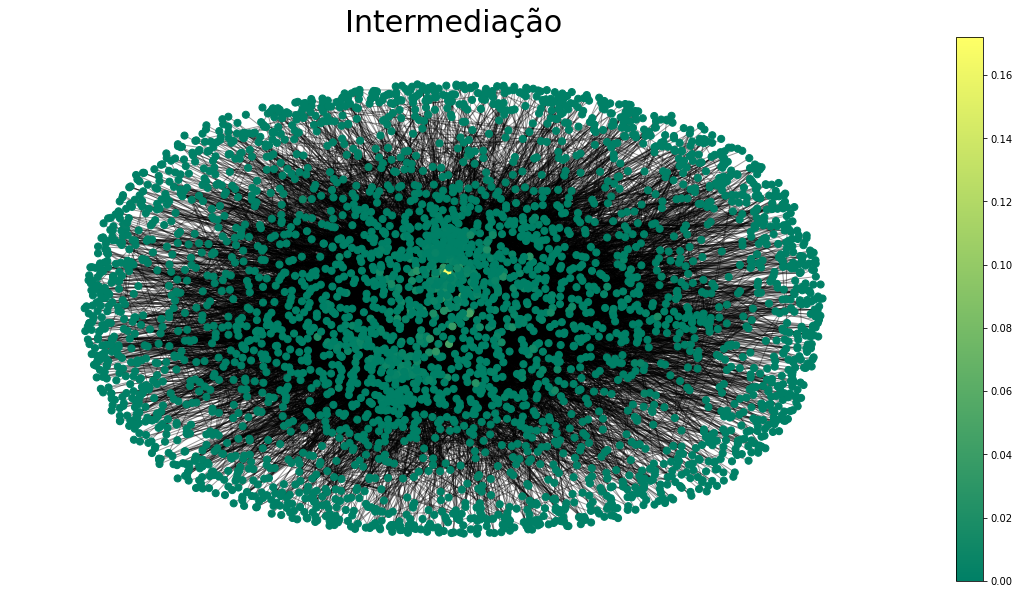

In [98]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
# pos = nx.spring_layout(G, seed= 1234, k=1)
# color = list(dict(nx.betweenness_centrality(G)).values())
nx.draw_networkx_edges(G,pos=pos,alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(G,pos=pos,node_color=color,cmap=plt.cm.summer,ax=ax, node_size=50)

plt.axis("off")
plt.colorbar(nodes)
plt.title('Intermediação', fontsize=30)
plt.show()

In [97]:
key = []
values = []

for k, v in dict(nx.betweenness_centrality(G)).items():
    key.append(k)
    values.append(v)
df = pd.DataFrame({'artist': key,'betweenness_centrality': values})
df.sort_values('betweenness_centrality', ascending=False, ignore_index=True).head(10)

,artist,betweenness_centrality
0,Drake,0.171960
1,Ed Sheeran,0.053842
2,Michael Bublé,0.048914
3,Glee Cast,0.047472
4,Justin Bieber,0.039709
5,John Mayer,0.037287
6,Kanye West,0.035376
7,The Beatles,0.032092
8,Kendrick Lamar,0.031955
9,Sufjan Stevens,0.027581


#### **centralidade do autovetor**

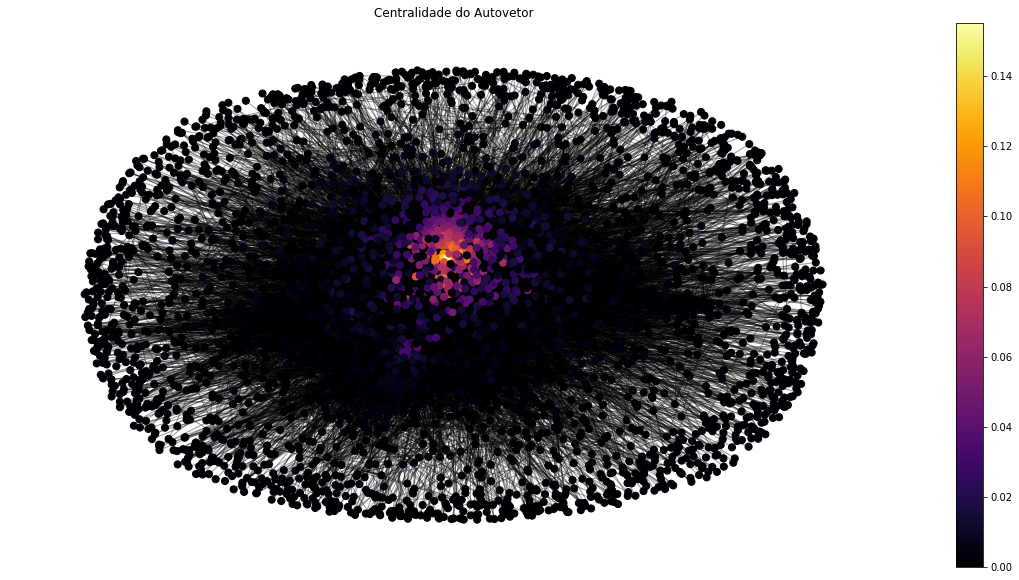

In [99]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
pos = nx.spring_layout(G, seed=1234, k=1)
color = list(dict(nx.eigenvector_centrality(G)).values())
nx.draw_networkx_edges(G,pos=pos,alpha=0.4, ax=ax)
nodes = nx.draw_networkx_nodes(G,pos=pos,node_color=color,cmap=plt.cm.inferno,ax=ax, node_size=50)

plt.axis("off")
plt.colorbar(nodes)
plt.title("Centralidade do Autovetor")
plt.show()


#### **Análise Bivariada**

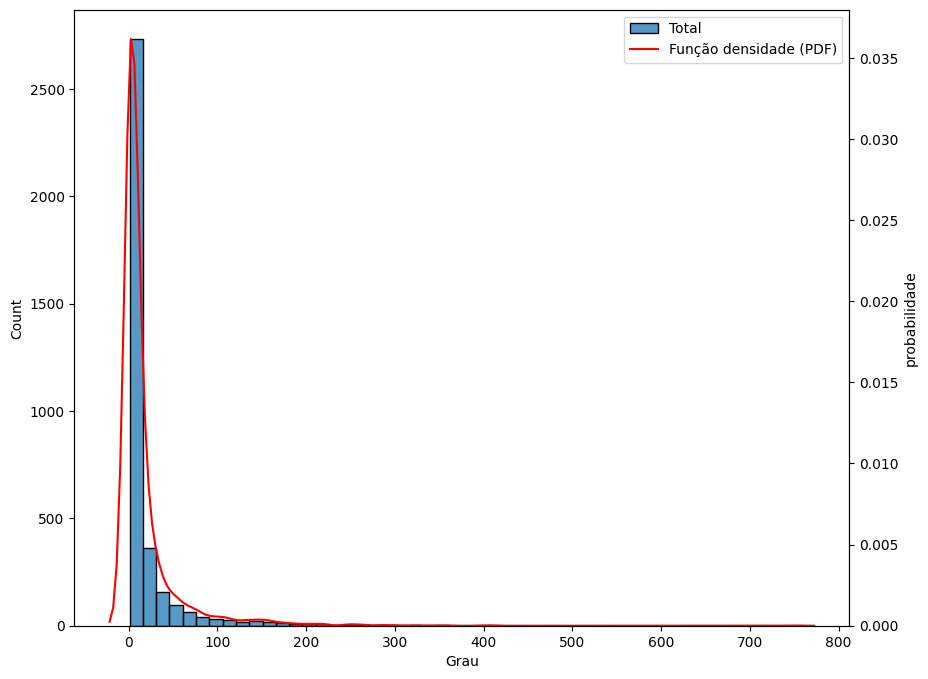

In [105]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
#pegando o histograma
sns.histplot(degree_sequence,bins=50,label="Total",ax=ax)
ax2 = ax.twinx()
#Estimativa de densidade kernel ou PDF
sns.kdeplot(degree_sequence,color='r',label="Função densidade (PDF)",ax=ax2)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("probabilidade")
plt.show()

#### **Análise Multivariada**

In [108]:
betweenness = pd.Series(nx.betweenness_centrality(G))
degree = pd.Series(nx.degree_centrality(G))
eigenvector = pd.Series(nx.eigenvector_centrality(G))
closeness = pd.Series(nx.closeness_centrality(G))

In [110]:
df = pd.DataFrame.from_dict({"Betweenness": betweenness,"Degree": degree,"EigenVector": eigenvector,"Closeness": closeness})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.000000,0.000553,0.000006,0.231212
1,0.001936,0.002766,0.000576,0.290175
2,0.001597,0.006639,0.000087,0.260240
3,0.000000,0.000553,0.001861,0.294309
4,0.031955,0.098755,0.119773,0.411966


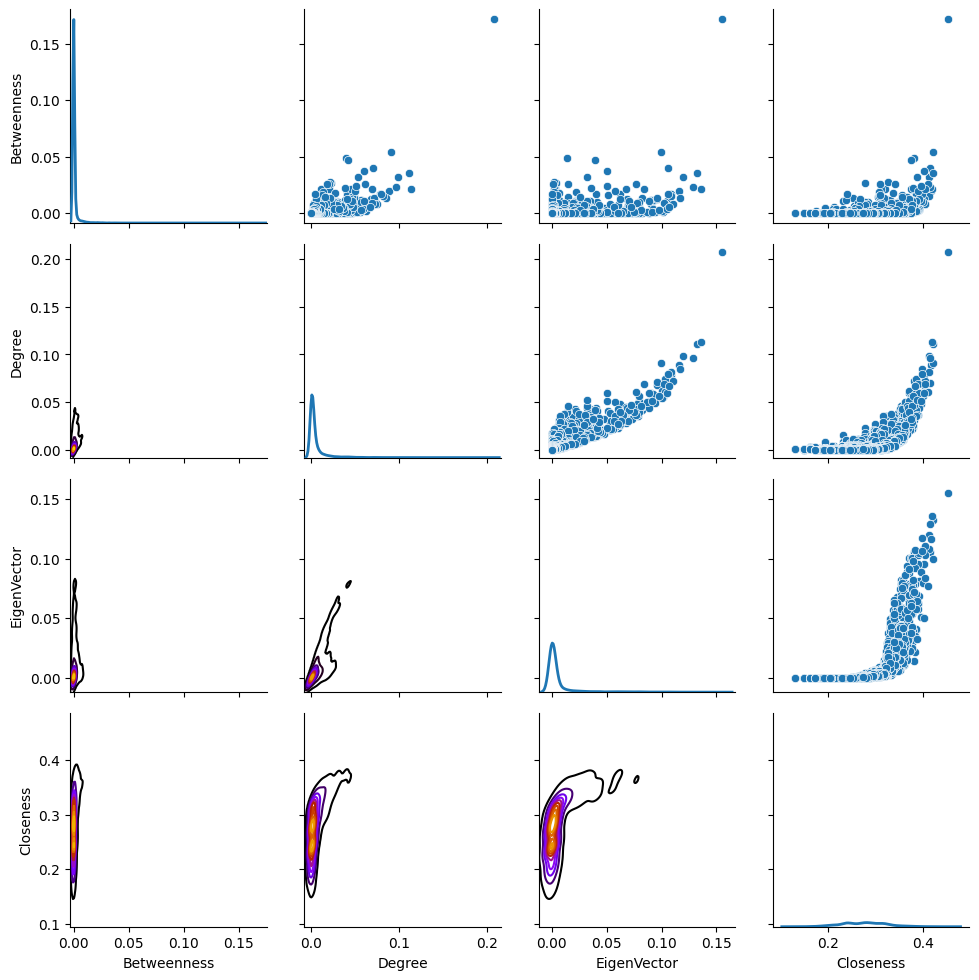

In [112]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="gnuplot")
fig.map_diag(sns.kdeplot, lw=2, legend=False)
plt.show()

#### **Análise Decomposição da Rede 2 k-cores mais profundos**